In [35]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV, VarianceThreshold, SelectKBest, mutual_info_classif, SelectKBest, SequentialFeatureSelector
from sklearn.linear_model import Lasso
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [3]:
%run pre_processing2.ipynb

Missing values in Diagnosis at the Patient Level
0=Unknown
1=benign or non-malignant disease
2= malignant, primary lung cancer
3 = malignant metastatic
: 847
Missing values in Diagnosis Method
0 = unknown
1 = review of radiological images to show 2 years of stable nodule
2 = biopsy
3 = surgical resection
4 = progression or response: 847
Missing values in Primary tumor site for metastatic disease: 847
Missing values in Diagnosis Nodule 1: 865
Missing values in Diagnosis Method Nodule 1: 865
Missing values in Diagnosis Nodule 2: 954
Missing values in Diagnosis Method Nodule 2: 954
Missing values in Diagnosis Nodule 3: 966
Missing values in Diagnosis Method Nodule 3: 966
Missing values in Diagnosis Nodule 4: 966
Missing values in Diagnosis Method Nodule 4: 966
Missing values in Diagnosis Nodule 5: 966
Missing values in Diagnosis Method Nodule 5: 966
Missing values in Diagnosis at the Patient Level
0=Unknown
1=benign or non-malignant disease
2= malignant, primary lung cancer
3 = malignant 

In [4]:
print("Columns in low_2d_sd:", low_2d_sd.columns)


Columns in low_2d_sd: Index(['Nodule_id', 'Patient_id', 'Subtlety', 'Internalstructure',
       'Calcification', 'Sphericity', 'Margin', 'Lobulation', 'Spiculation',
       'Texture',
       ...
       'Diagnosis Nodule 1', 'Diagnosis Method Nodule 1', 'Diagnosis Nodule 2',
       'Diagnosis Method Nodule 2', 'Diagnosis Nodule 3',
       'Diagnosis Method Nodule 3', 'Diagnosis Nodule 4',
       'Diagnosis Method Nodule 4', 'Diagnosis Nodule 5',
       'Diagnosis Method Nodule 5'],
      dtype='object', length=102)


# Recursive Feature Elimination (RFE)

In [5]:

# Assuming 'Malignancy' is your target column
target_column = low_2d_sd['Malignancy']

# Check if it's a Series
if isinstance(target_column, pd.Series) and target_column.ndim == 1:
    print("'Malignancy' is a 1-dimensional Series.")
else:
    print("'Malignancy' is not a 1-dimensional Series.")


'Malignancy' is a 1-dimensional Series.


In [6]:

def rfe(dataframe, target_column, num_features_to_select=5):
    # Split the DataFrame into X (features) and y (target)
    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]
    
    # Create the RFE model with a RandomForestClassifier (you can use any other estimator)
    model = RandomForestClassifier()
    
    # Create an RFE model with cross-validation
    rfe = RFECV(model, step=1, cv=5, scoring='accuracy', min_features_to_select=num_features_to_select)
    
    # Fit the RFE model to the data
    rfe.fit(X, y)
    
    # Get the selected features
    selected_features = X.columns[rfe.support_]
    
    return selected_features


In [7]:
low_rfe = rfe(low_2d_sd, 'Malignancy')
print("Selected Features:", low_rfe)

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Selected Features: Index(['Nodule_id', 'Patient_id', 'Subtlety', 'Calcification', 'Margin',
       'Spiculation', 'original_shape_Elongation',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio',
       'original_shape_VoxelVolume', 'original_firstorder_Energy',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunEntropy', 'original_gldm_DependenceNonUniformity',
       'original_gldm_DependenceVariance',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_gldm_SmallDependenceEmphasis',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis',
       'Primary tumor site for metastatic disease'],
      dtype=

In [8]:
medium_rfe = rfe(medium_2d_sd, 'Malignancy')
print("Selected Features:", medium_rfe)

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Selected Features: Index(['Nodule_id', 'Subtlety', 'Calcification', 'Margin',
       'original_shape_Elongation', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_MinorAxisLength', 'original_shape_SurfaceVolumeRatio',
       'original_glrlm_RunEntropy',
       'original_glszm_LargeAreaHighGrayLevelEmphasis',
       'original_gldm_DependenceNonUniformity',
       'original_gldm_DependenceVariance',
       'original_gldm_SmallDependenceEmphasis',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis'],
      dtype='object')


In [9]:
high_rfe = rfe(high_2d_sd, 'Malignancy')
print("Selected Features:", high_rfe)

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Selected Features: Index(['Nodule_id', 'Patient_id', 'Subtlety', 'Calcification', 'Margin',
       'Lobulation', 'Spiculation', 'original_shape_Elongation',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio',
       'original_firstorder_Energy', 'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_RunEntropy', 'original_glrlm_RunPercentage',
       'original_glrlm_ShortRunLowGrayLevelEmphasis',
       'original_glszm_LargeAreaLowGrayLevelEmphasis',
       'original_glszm_ZonePercentage',
       'original_gldm_DependenceNonUniformity',
       'original_gldm_DependenceVariance',
       'original_gldm_SmallDependenceEmphasis',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis',
       

# Feature Importance from Trees

In [10]:
def feature_select_trees(threshold, dataframe, target_column):
    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)
    feature_importances = model.feature_importances_
    selected_features = X.columns[feature_importances > threshold]
    return selected_features 



In [11]:
low_tree_01 = feature_select_trees(0.01, low_2d_sd, 'Malignancy')
medium_tree_01 = feature_select_trees(0.01, medium_2d_sd, 'Malignancy')
high_tree_01 = feature_select_trees(0.01, high_2d_sd, 'Malignancy')
low_tree_02 = feature_select_trees(0.02, low_2d_sd, 'Malignancy')
medium_tree_02 = feature_select_trees(0.02, medium_2d_sd, 'Malignancy')
high_tree_02 = feature_select_trees(0.02, high_2d_sd, 'Malignancy')
print("Threshold 0.01:")
print("Low 2D SD:")
print(low_tree_01)
print("Medium 2D SD:")
print(medium_tree_01)
print("High 2D SD:")
print(high_tree_01)
print()
print("Threshold 0.02:")
print("Low 2D SD:")
print(low_tree_02)
print("Medium 2D SD:")
print(medium_tree_02)
print("High 2D SD:")
print(high_tree_02)
print()


Threshold 0.01:
Low 2D SD:
Index(['Nodule_id', 'Patient_id', 'Subtlety', 'Calcification', 'Margin',
       'Lobulation', 'Spiculation', 'original_shape_Elongation',
       'original_shape_Flatness', 'original_shape_LeastAxisLength',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio',
       'original_shape_VoxelVolume', 'original_firstorder_Energy',
       'original_firstorder_TotalEnergy',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunEntropy', 'original_glrlm_RunLengthNonUniformity',
       'original_glrlm_RunLengthNonUniformityNormalized',

# Variance Threshold

In [12]:

def variance_threshold(threshold, dataframe, target_column):
    X = dataframe.drop(columns=[target_column])
    selector = VarianceThreshold(threshold=threshold)
    X_high_variance = selector.fit_transform(X)
    
    # Get the feature indices selected by the VarianceThreshold
    selected_feature_indices = selector.get_support(indices=True)
    
    # Get the names of the selected features
    selected_feature_names = X.columns[selected_feature_indices]
    
    return X_high_variance, selected_feature_names



In [13]:
X_high_variance1, low_variance_threshold = variance_threshold(0.01, low_2d_sd, 'Malignancy')
X_high_variance2, medium_variance_threshold = variance_threshold(0.01, medium_2d_sd, 'Malignancy')
X_high_variance3, high_variance_threshold = variance_threshold(0.01, high_2d_sd, 'Malignancy')
print("Low Variance Threshold:")
print(low_variance_threshold)
print("Medium Variance Threshold:")
print(medium_variance_threshold)
print("High Variance Threshold:")
print(high_variance_threshold)


Low Variance Threshold:
Index(['Nodule_id', 'Patient_id', 'Subtlety', 'Internalstructure',
       'Calcification', 'Sphericity', 'Margin', 'Lobulation', 'Spiculation',
       'Texture', 'original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_MinorAxisLength', 'original_shape_SurfaceArea',
       'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume',
       'original_firstorder_Energy', 'original_firstorder_TotalEnergy',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunEntropy', 'original_glrlm_RunLengthNonUniformity',
       'original_glrlm_RunLengthNonUniformityNorma

# SelectKBest and SelectPercentile

In [14]:
def KBest_Percentile(dataframe, target_column):
    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]
    model = Lasso(alpha=0.01)
    model.fit(X, y)
    selected_features = X.columns[model.coef_ != 0]
    return selected_features



In [15]:
print("Low KBest_Percentile:")
low_k_best= KBest_Percentile(low_2d_sd, 'Malignancy')
print(low_k_best)
print("Medium KBest_Percentile:")
medium_k_best= KBest_Percentile(medium_2d_sd, 'Malignancy')
print(medium_k_best)
print("High KBest_Percentile:")
high_k_best= KBest_Percentile(high_2d_sd, 'Malignancy')
print(high_k_best)


Low KBest_Percentile:
Index(['Nodule_id', 'Patient_id', 'Subtlety', 'Internalstructure',
       'Calcification', 'Sphericity', 'Margin', 'Lobulation',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_MinorAxisLength', 'original_shape_SurfaceArea',
       'original_shape_VoxelVolume', 'original_firstorder_Energy',
       'original_firstorder_TotalEnergy',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunLengthNonUniformity',
       'original_glszm_LargeAreaEmphasis',
       'original_glszm_LargeAreaHighGrayLevelEmphasis',
       'original_glszm_LargeAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneVariance', 'original_gldm_DependenceNonUniformity',
       'original_gldm_D

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.576e+01, tolerance: 7.444e-03
  model = cd_fast.enet_coordinate_descent(
/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.576e+01, tolerance: 7.444e-03
  model = cd_fast.enet_coordinate_descent(
/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

# Choosing the best features

### Metrics

In [53]:
def find_k_knn(X,y,kmax):
    k_values = [i for i in range (1,kmax+1)]
    accuracies = []
    for k in k_values:
        model = KNeighborsClassifier(k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    print(accuracies)

    #Ploting the results of Cross Validation
    sns.lineplot(x = k_values, y = accuracies, marker = 'o')
    plt.xlabel("K Values")
    plt.ylabel("Accuracy Score of k-NN")
    plt.title('Estimates by Cross Validation')

    best_index = np.argmax(accuracies)
    best_k = k_values[best_index]
    print(f'Best k = {best_k}')

### 1. CrossValidation

In [16]:
def cross_validation(df, group, target_column):
    X = df[group]
    Y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    cv_scores_group = cross_val_score(RandomForestClassifier(random_state=42), X_train, y_train, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred_group = model.predict(X_test)
    accuracy_group = accuracy_score(y_test, y_pred_group)
    
    return cv_scores_group.mean(), accuracy_group

#### rfe

In [54]:
#sd=0.5
Y = low_2d_sd['Malignancy']
X = low_2d_sd[low_rfe]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_low_rfe= cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_low_rfe = accuracy_score(y_test, y_pred_group)

cv_scores_low_rfe.mean(), accuracy_low_rfe


/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.631578947368421, 0.5833333333333334)

In [55]:
#sd=1.0
Y = medium_2d_sd['Malignancy']
X = medium_2d_sd[medium_rfe]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_medium_rfe = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_medium_rfe = accuracy_score(y_test, y_pred_group)

cv_scores_medium_rfe.mean(), accuracy_medium_rfe

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.7052631578947368, 0.5833333333333334)

In [56]:
y_pred2 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy)

0.5833333333333334


[0.375, 0.3333333333333333, 0.2916666666666667, 0.3333333333333333, 0.2916666666666667, 0.375, 0.375, 0.4583333333333333, 0.5, 0.4583333333333333, 0.4583333333333333, 0.4166666666666667, 0.4583333333333333, 0.4583333333333333, 0.5, 0.4583333333333333, 0.5, 0.5, 0.4583333333333333, 0.4583333333333333]
Best k = 9


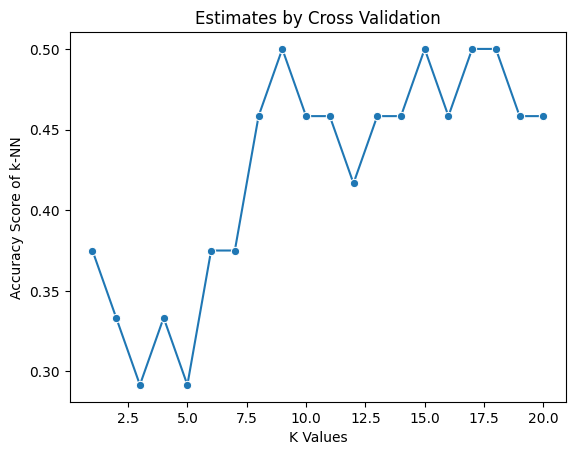

In [57]:
find_k_knn(X,Y,20)

In [61]:
#sd=1.5
Y = high_2d_sd['Malignancy']
X = high_2d_sd[high_rfe]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_high_rfe = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_high_rfe = accuracy_score(y_test, y_pred_group)

cv_scores_high_rfe.mean(), accuracy_high_rfe

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6631578947368421, 0.5833333333333334)

In [62]:
y_pred2 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy)

0.5833333333333334


[0.375, 0.3333333333333333, 0.3333333333333333, 0.2916666666666667, 0.25, 0.3333333333333333, 0.375, 0.4583333333333333, 0.5, 0.4583333333333333, 0.5, 0.4583333333333333, 0.4583333333333333, 0.4583333333333333, 0.5, 0.4583333333333333, 0.5, 0.5, 0.4166666666666667, 0.4583333333333333]
Best k = 9


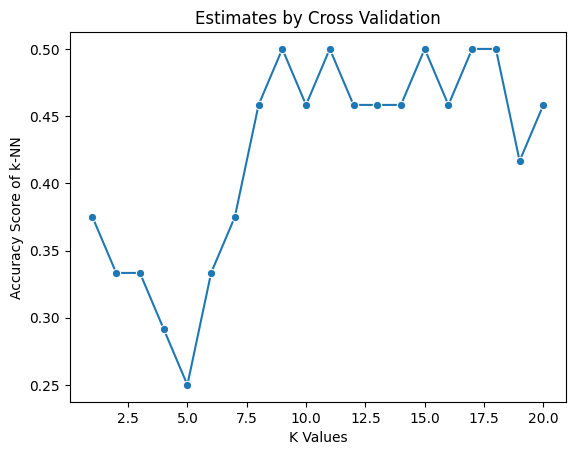

In [63]:
find_k_knn(X,Y,20)

#### tree

In [20]:
#sd=0.5 com threshold 0.01
Y = low_2d_sd['Malignancy']
X = low_2d_sd[low_tree_01]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_tree_low01 = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')


model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_tree_low01 = accuracy_score(y_test, y_pred_group)

cv_scores_tree_low01.mean(), accuracy_tree_low01

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6210526315789473, 0.4583333333333333)

In [58]:
#sd=0.5 com threshold 0.02
Y = low_2d_sd['Malignancy']
X = low_2d_sd[low_tree_02]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_tree_low02 = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_tree_low02 = accuracy_score(y_test, y_pred_group)

cv_scores_tree_low02.mean(), accuracy_tree_low02

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.7052631578947368, 0.5833333333333334)

In [59]:
y_pred2 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy)

0.5833333333333334


[0.625, 0.4583333333333333, 0.4166666666666667, 0.5833333333333334, 0.4583333333333333, 0.375, 0.5, 0.4583333333333333, 0.5, 0.5, 0.5416666666666666, 0.4583333333333333, 0.4166666666666667, 0.5, 0.4583333333333333, 0.4166666666666667, 0.375, 0.375, 0.2916666666666667, 0.4166666666666667]
Best k = 1


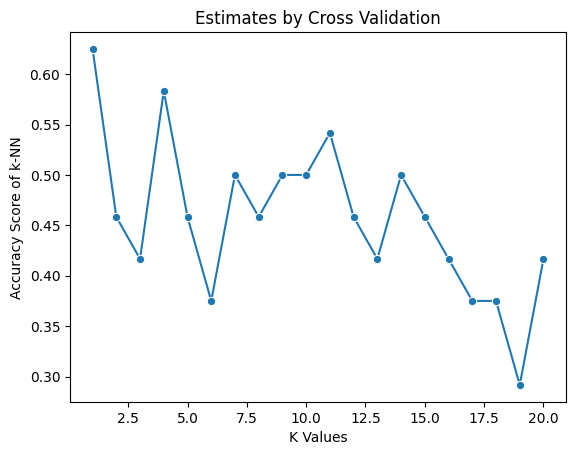

In [60]:
find_k_knn(X,Y,20)

In [22]:
#sd=1.0 com threshold 0.01
Y = medium_2d_sd['Malignancy']
X = medium_2d_sd[medium_tree_01]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_tree_medium01 = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_tree_medium01 = accuracy_score(y_test, y_pred_group)

cv_scores_tree_medium01.mean(), accuracy_tree_medium01

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6, 0.375)

In [47]:
#sd=1.0 com threshold 0.02
Y = medium_2d_sd['Malignancy']
X = medium_2d_sd[medium_tree_02]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_tree_medium02 = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_tree_medium02 = accuracy_score(y_test, y_pred_group)

cv_scores_tree_medium02.mean(), accuracy_tree_medium02

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6526315789473685, 0.625)

In [24]:
#sd=1.5 com threshold 0.01
Y = high_2d_sd['Malignancy']
X = high_2d_sd[high_tree_01]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_tree_high01 = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_tree_high01 = accuracy_score(y_test, y_pred_group)

cv_scores_tree_high01.mean(), accuracy_tree_high01 

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6, 0.375)

In [25]:
#sd=1.5 com threshold 0.01
Y = high_2d_sd['Malignancy']
X = high_2d_sd[high_tree_02]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_tree_high02 = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_tree_high02 = accuracy_score(y_test, y_pred_group)

cv_scores_tree_high02.mean(), accuracy_tree_high02 

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6526315789473685, 0.625)

#### Variance threshold

In [26]:
#sd=0.5
Y = low_2d_sd['Malignancy']
X = low_2d_sd[low_variance_threshold]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_low_vt = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_low_vt = accuracy_score(y_test, y_pred_group)

cv_scores_low_vt.mean(), accuracy_low_vt

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.5894736842105264, 0.5833333333333334)

In [27]:
#sd=1.0
Y = medium_2d_sd['Malignancy']
X = medium_2d_sd[medium_variance_threshold]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_medium_vt = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_medium_vt = accuracy_score(y_test, y_pred_group)

cv_scores_medium_vt.mean(), accuracy_medium_vt 

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.5894736842105264, 0.5833333333333334)

In [28]:
#sd=1.5
Y = high_2d_sd['Malignancy']
X = high_2d_sd[high_variance_threshold]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_high_vt = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_high_vt = accuracy_score(y_test, y_pred_group)

cv_scores_high_vt.mean(), accuracy_high_vt 

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.5894736842105264, 0.5833333333333334)

#### SelectKBest and SelectPercentile

In [29]:
#sd = 0.5
Y = low_2d_sd['Malignancy']
X = low_2d_sd[low_k_best]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_low_k_best = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_low_k_best = accuracy_score(y_test, y_pred_group)

cv_scores_low_k_best.mean(), accuracy_low_k_best

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6105263157894736, 0.5)

In [30]:
#sd=1.0
Y = medium_2d_sd['Malignancy']
X = medium_2d_sd[medium_k_best]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_medium_k_best = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_medium_k_best = accuracy_score(y_test, y_pred_group)

cv_scores_medium_k_best .mean(), accuracy_medium_k_best

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6105263157894736, 0.5)

In [31]:
#sd=1.5
Y = high_2d_sd['Malignancy']
X = high_2d_sd[high_k_best]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
cv_scores_high_k_best = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_high_k_best = accuracy_score(y_test, y_pred_group)

cv_scores_high_k_best.mean(), accuracy_high_k_best

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6105263157894736, 0.5)

## Cross-Validation Score Comparison

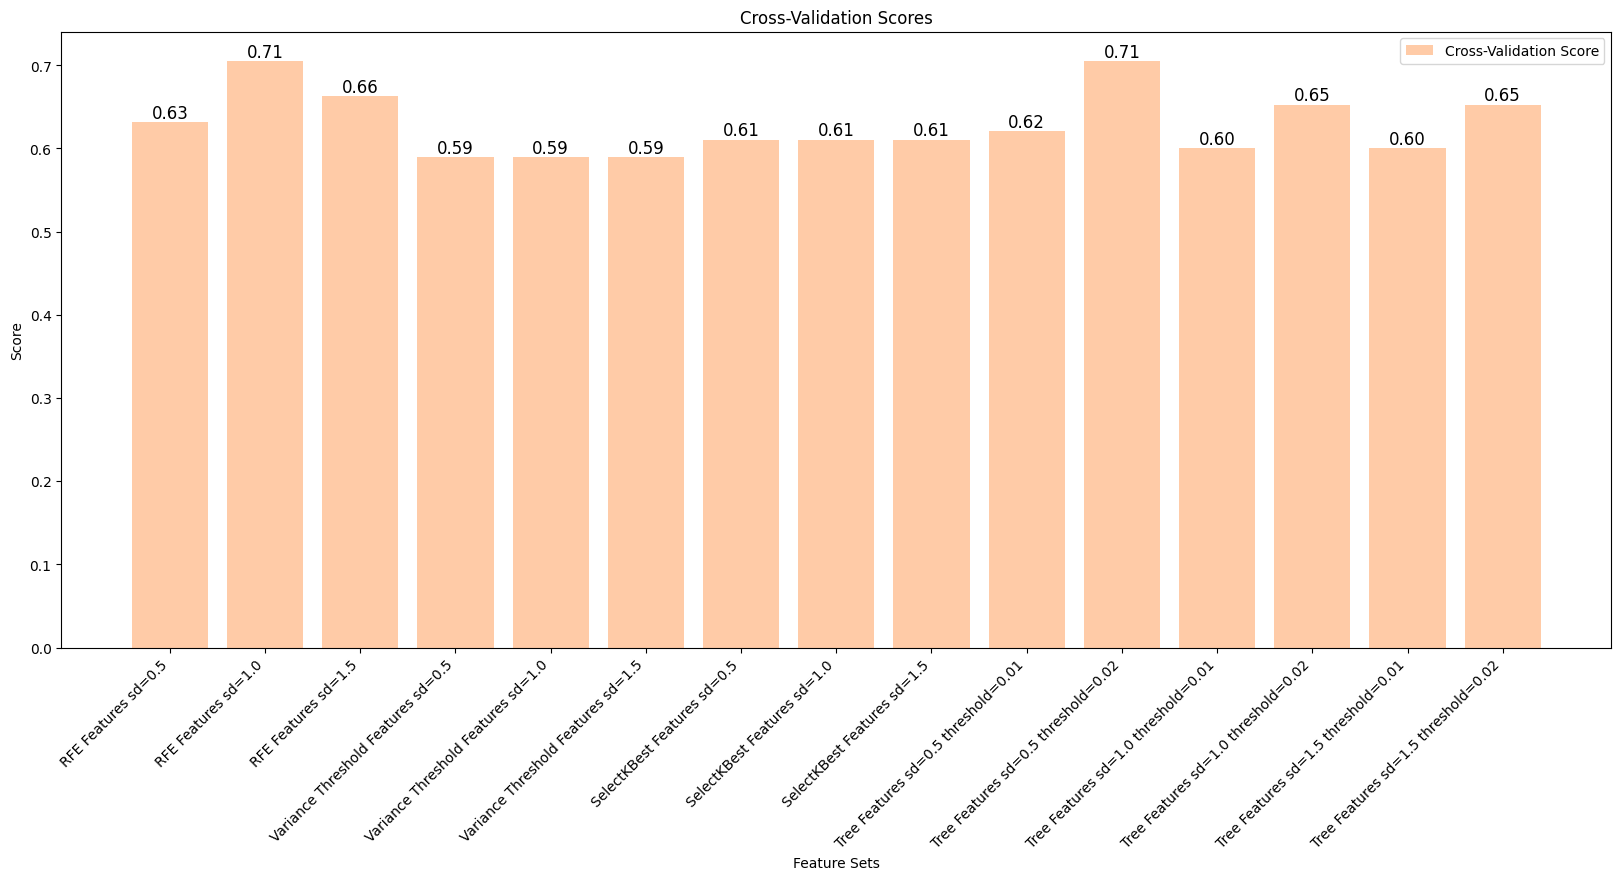

In [32]:

feature_sets = ["RFE Features sd=0.5", "RFE Features sd=1.0", "RFE Features sd=1.5", "Variance Threshold Features sd=0.5", "Variance Threshold Features sd=1.0", "Variance Threshold Features sd=1.5", "SelectKBest Features sd=0.5", "SelectKBest Features sd=1.0", "SelectKBest Features sd=1.5", "Tree Features sd=0.5 threshold=0.01", "Tree Features sd=0.5 threshold=0.02", "Tree Features sd=1.0 threshold=0.01", "Tree Features sd=1.0 threshold=0.02", "Tree Features sd=1.5 threshold=0.01", "Tree Features sd=1.5 threshold=0.02"]

# Lista de pontuações de validação cruzada correspondentes a cada conjunto de características
cross_val_scores = [cv_scores_low_rfe,cv_scores_medium_rfe, cv_scores_high_rfe, cv_scores_low_vt, cv_scores_medium_vt, cv_scores_high_vt, cv_scores_low_k_best, cv_scores_medium_k_best, cv_scores_high_k_best, cv_scores_tree_low01, cv_scores_tree_low02, cv_scores_tree_medium01, cv_scores_tree_medium02, cv_scores_tree_high01, cv_scores_tree_high02]

# Criar um gráfico de barras para as pontuações de validação cruzada
plt.figure(figsize=(20, 8))
bars = plt.bar(feature_sets, [score.mean() for score in cross_val_scores], color='#FF7F24', alpha=0.4, label='Cross-Validation Score')
plt.xlabel('Feature Sets')
plt.ylabel('Score')
plt.xticks(rotation=45, ha="right")  
plt.legend(loc='best')
plt.title('Cross-Validation Scores')

# Ajuste do tamanho da fonte para as etiquetas nas barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12, color='black')



## Cross-Validation Accuracy Score Comparison

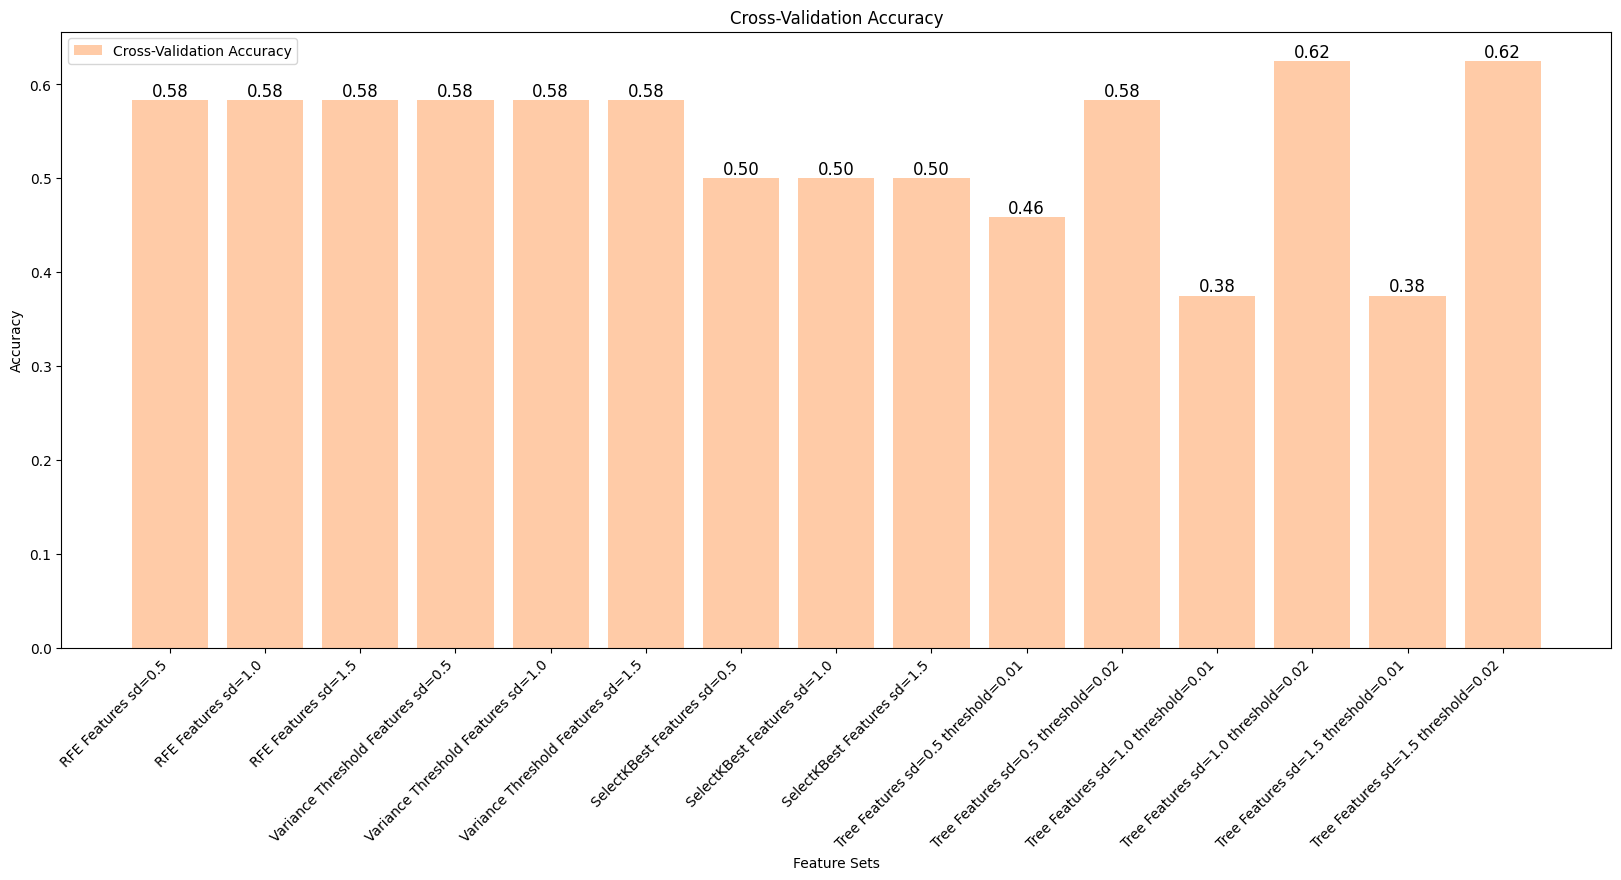

In [33]:

feature_sets = ["RFE Features sd=0.5", "RFE Features sd=1.0", "RFE Features sd=1.5", "Variance Threshold Features sd=0.5", "Variance Threshold Features sd=1.0", "Variance Threshold Features sd=1.5", "SelectKBest Features sd=0.5", "SelectKBest Features sd=1.0", "SelectKBest Features sd=1.5", "Tree Features sd=0.5 threshold=0.01", "Tree Features sd=0.5 threshold=0.02", "Tree Features sd=1.0 threshold=0.01", "Tree Features sd=1.0 threshold=0.02", "Tree Features sd=1.5 threshold=0.01", "Tree Features sd=1.5 threshold=0.02"]

# Lista de pontuações de validação cruzada correspondentes a cada conjunto de características
accuracy = [accuracy_low_rfe, accuracy_medium_rfe, accuracy_high_rfe, accuracy_low_vt, accuracy_medium_vt, accuracy_high_vt, accuracy_low_k_best, accuracy_medium_k_best, accuracy_high_k_best, accuracy_tree_low01, accuracy_tree_low02, accuracy_tree_medium01, accuracy_tree_medium02, accuracy_tree_high01, accuracy_tree_high02]

# Criar um gráfico de barras para as pontuações de validação cruzada
plt.figure(figsize=(20, 8))
bars = plt.bar(feature_sets, [score.mean() for score in accuracy], color='#FF7F24', alpha=0.4, label='Cross-Validation Accuracy')
plt.xlabel('Feature Sets')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha="right")  
plt.legend(loc='best')
plt.title('Cross-Validation Accuracy')

# Ajuste do tamanho da fonte para as etiquetas nas barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12, color='black')

